**Logistic Regression:**

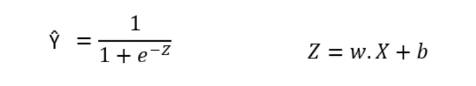

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

**Derivatives:**

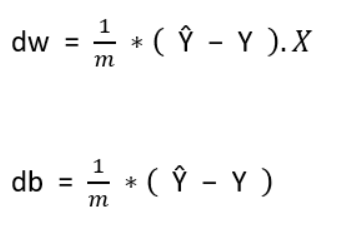

In [ ]:
#importing numpy
import numpy as np

#Logistic regression model:

In [ ]:
class logistic_regression():

    # initiating the learning rate and no. of iterations for this model (hyper parameters)
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # from the dataset, create a model which fits the datapoints
    def fit(self, x,y):

        # no. of input features(coulmns) and data points(rows) in the dataset
        if len(x.shape) == 1 :
            self.m = x.shape[0]
            self.n = 1
        else:
            self.m, self.n = x.shape

        # initiating the random weights and bias
        self.w = np.zeros(self.n)
        self.b = 0

        self.x = x
        self.y = y

        #updating the parameters
        for i in range(self.no_of_iterations):
            self.update_parameters()


    def update_parameters(self):
        y_hat = self.predict(self.x)

        # derivatives
        dw = (1/self.m) * np.dot(self.x.T , (y_hat - self.y))
        db = (1/self.m) * np.sum(y_hat - self.y)

        #updating
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db


    def predict(self,x):
        y_pred = ( 1/ ( 1 + np.exp(- (x.dot(self.w) + self.b) ) ) )

        y_pred = np.where(y_pred > 0.5 , 1 , 0)
        return y_pred



# Using this model on data:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non - diabetic

1 --> Diabetic

In [ ]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#seperating the features and labels
features = diabetes_data.drop(columns = 'Outcome', axis = 1)
label = diabetes_data['Outcome']

In [ ]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(label)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# we can see different features are in different ranges (0-10 , 100 - 150) etc, so we need to standardize the data
scaler = StandardScaler()

In [ ]:
scaler.fit(features)

StandardScaler()

In [ ]:
std_data = scaler.transform(features)

In [ ]:
print(std_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features = std_data
target = diabetes_data['Outcome']

In [ ]:
# train test splitting
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2, random_state = 2)

In [ ]:
print(features.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
#training the model
model = logistic_regression(learning_rate=0.01, no_of_iterations=1000)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
#model evaluation
x_train_pred = model.predict(x_train)
training_accuracy = accuracy_score(x_train_pred, y_train)

In [ ]:
print(training_accuracy)

0.6905537459283387


In [ ]:
x_test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print(test_accuracy)

0.7142857142857143


In [ ]:
#making predictive system:

input_data = (5,166,72,19,175,25.8,0.587,51)

#converting to numpy
input_np_data = np.asarray(input_data)

# reshaping
input_reshaped = input_np_data.reshape(1,-1)

# standardize
std_input_data = scaler.transform(input_reshaped)

prediction = model.predict(std_input_data)
# print(prediction)

if(prediction[0] == 1):
    print("The patient is Diabetic.")
else:
    print("The patient is non-diabetic.")

The patient is Diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
